In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_json(path_or_buf='imoveis.json',orient='columns')

In [ ]:
data

In [ ]:
data.ident[0]

In [ ]:
data.listing[0]

In [ ]:
data_list1 = pd.json_normalize(data.ident)

In [ ]:
data_list1.head()

In [ ]:
data_list2 = pd.json_normalize(data.listing)

In [ ]:
data_list2.head()

In [ ]:
property_data = pd.concat([data_list1,data_list2],axis=1)

In [ ]:
property_data.head()

In [ ]:
property_data.shape 

In [ ]:
for column in property_data.columns:
    print('----'*10)
    print(property_data[column].value_counts())

In [ ]:
property_data= property_data[(property_data['types.usage'] == 'Residencial')&(property_data['address.city'] == 'Rio de Janeiro')]

In [ ]:
property_data.head()

In [ ]:
property_data.info() 

In [ ]:
property_data.reset_index(drop=True, inplace=True)

In [ ]:
property_data.info(verbose= False)

In [ ]:
property_data = property_data.astype({
    'prices.price':'float64',
    'prices.tax.iptu':'float64',
    'prices.tax.condo':'float64',
    'features.usableAreas':'int64',
    'features.totalAreas':'int64'
})

In [ ]:
property_data.info()

In [ ]:
property_data['address.zone'].value_counts()

In [ ]:
property_data['address.zone'] = property_data['address.zone'].replace('',np.nan) 

In [ ]:
property_data['address.zone'].value_counts()

In [ ]:
property_data['address.zone'].isnull().value_counts()

In [ ]:
property_data.info()

In [ ]:
property_data.head()

In [ ]:
dict = property_data[~property_data['address.zone'].isna()].drop_duplicates(subset=['address.neighborhood']).to_dict('records')
print(dict)

In [ ]:
property_data['address.zone'].isnull().sum()

In [ ]:
zones_dict = {dic['address.neighborhood']:dic['address.zone']for dic in dict}

In [ ]:
print(zones_dict)

In [ ]:
for neighbor, zone in zones_dict.items():
    property_data.loc[property_data['address.neighborhood']==neighbor,'address.zone']=zone

In [ ]:
property_data.head()

In [ ]:
property_data['address.zone'].isnull().sum()

In [ ]:
property_data['prices.tax.condo'].isnull().sum()

In [ ]:
property_data['prices.tax.iptu'].isnull().sum()

In [ ]:
property_data['prices.tax.condo'].fillna(0,inplace = True)
property_data['prices.tax.iptu'].fillna(0,inplace = True)

In [ ]:
print(f"Total of null values in tax condo: {property_data['prices.tax.condo'].isnull().sum()}")
print(f"Total of null values in tax iptu: {property_data['prices.tax.iptu'].isnull().sum()}")

In [ ]:
property_data.drop(['customerID','source','types.usage','address.city',
                    'address.location.lon','address.location.lat','address.neighborhood'],axis=1, inplace= True)

In [ ]:
dict_columns = { 
    'types.unit':'unit','address.zone': 'zone','prices.price':'price',
    'prices.tax.condo':'tax.condo','prices.tax.iptu':'tax.iptu','features.bedrooms':'bedrooms',
    'features.bathrooms':'bathrooms','features.suites':'suites','features.parkingSpaces':'parkingSpaces',
    'features.usableAreas':'usableAreas', 'features.totalAreas':'totalAreas', 'features.floors':'floors',
    'features.unitsOnTheFloor': 'unitsOnTheFloor','features.unitFloor':'unitFloor'
}

In [ ]:
property_data = property_data.rename(dict_columns, axis=1)
property_data.head()

In [112]:
column_n = property_data.select_dtypes(include=['number'])

correlation = column_n.corr()
correlation

,price,tax.iptu,tax.condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax.iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax.condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [113]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

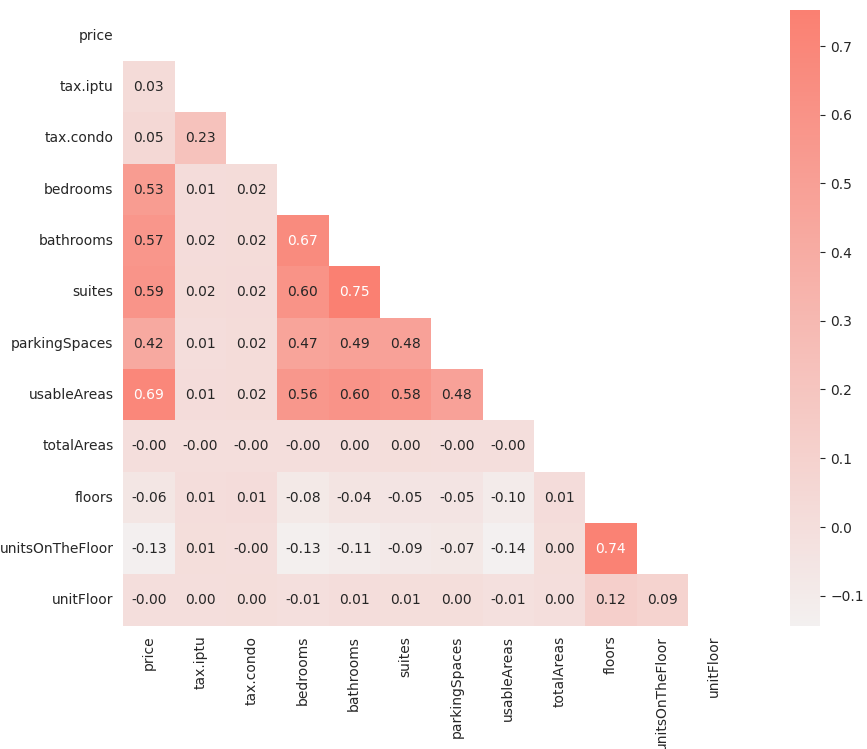

In [117]:
colors = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlation, cmap=colors, mask=mask, square=True, fmt='.2f', annot=True)

<Axes: >

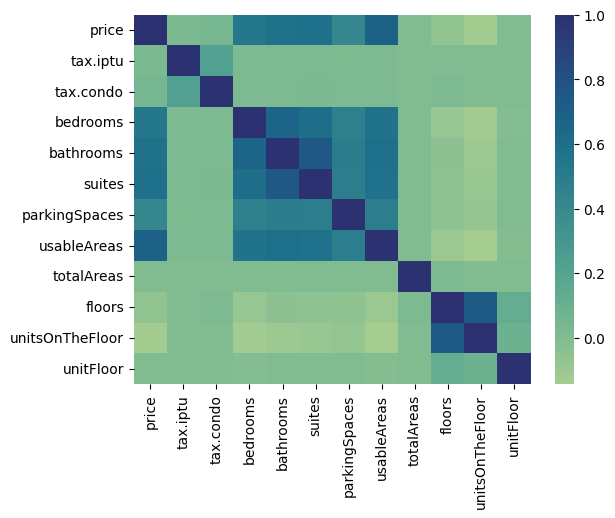

In [118]:
sns.heatmap(correlation, cmap='crest')

<Axes: >

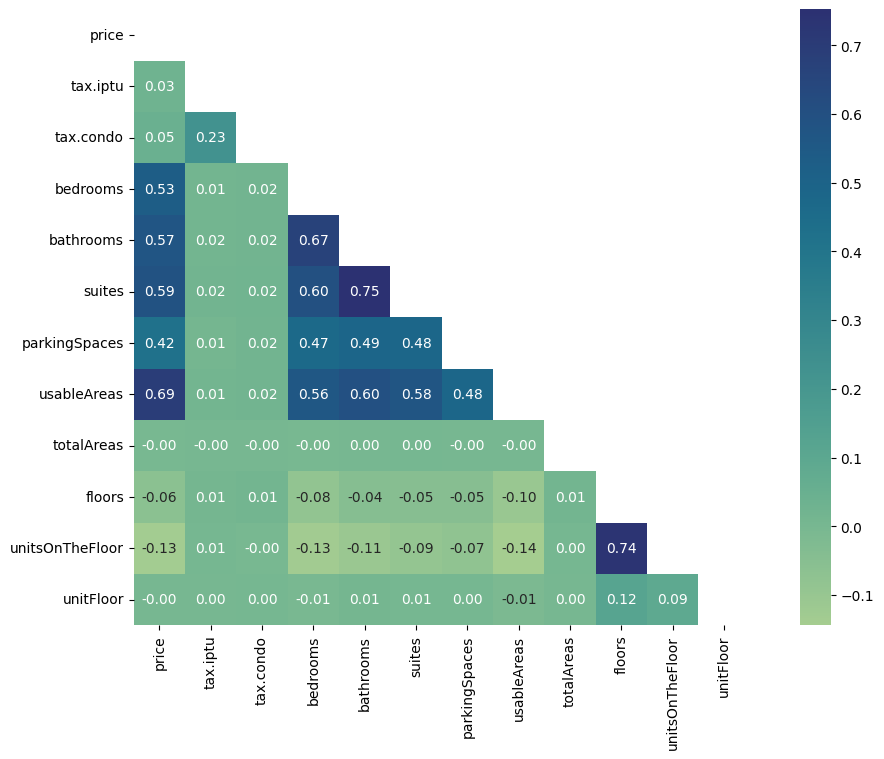

In [119]:
plt.figure(figsize=(13,8))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, cmap='crest', mask=mask, square=True, fmt='.2f', annot=True)

c:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\Pandas\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\Pandas\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Price')

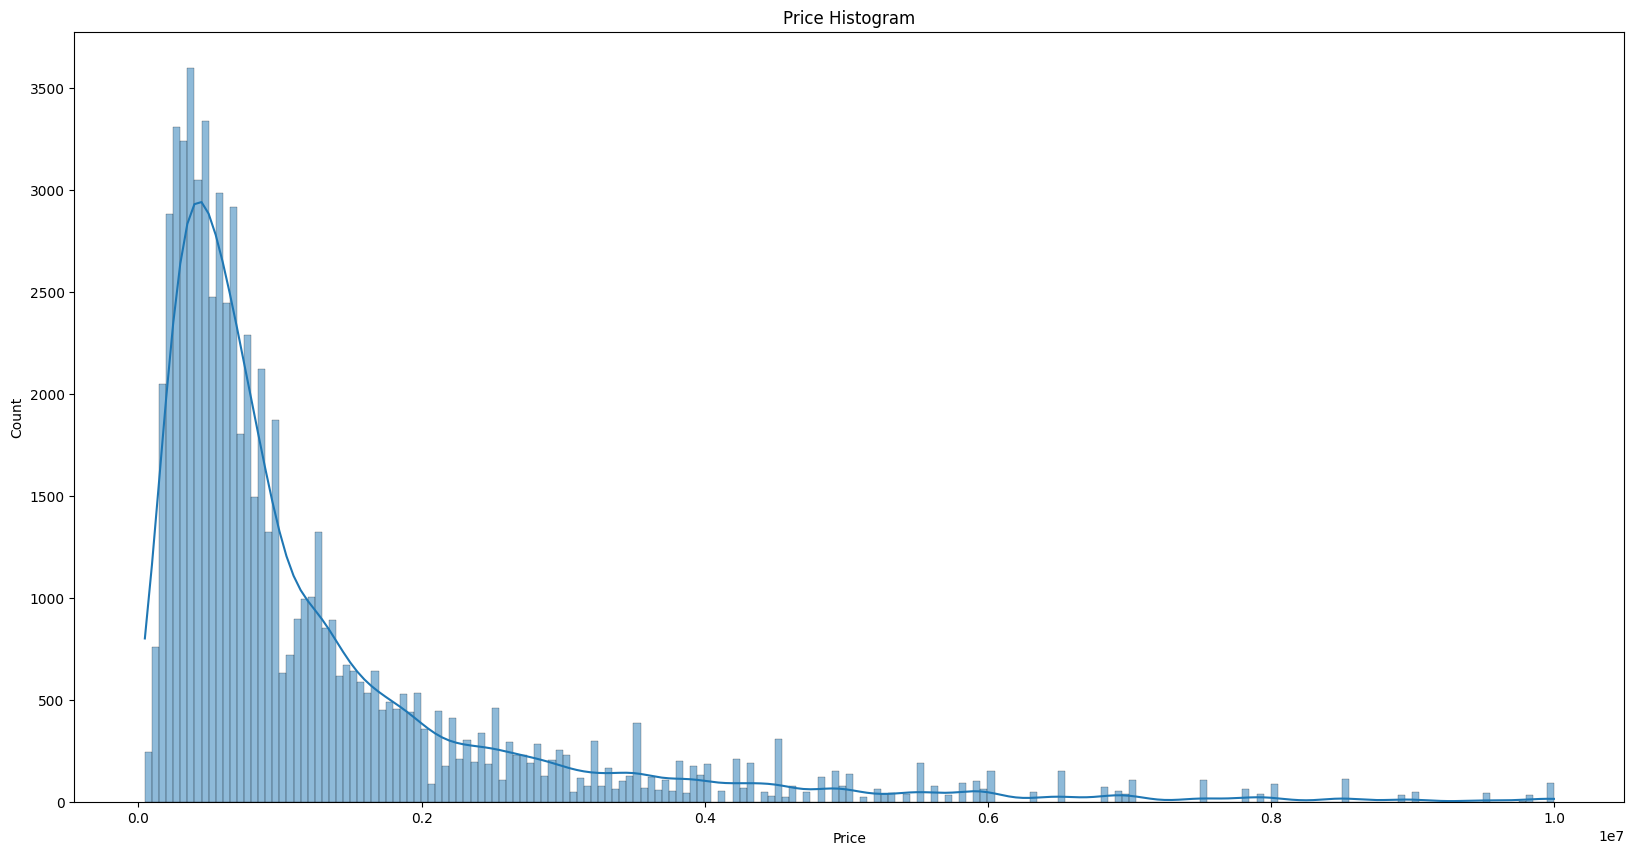

In [123]:
ax = sns.histplot(data=property_data, x='price', kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Price Histogram')
ax.set_xlabel('Price')

In [122]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
from sklearn.preprocessing import FunctionTransformer

In [126]:
transformer = FunctionTransformer(np.log1p, validate=True)
transformed_data = transformer.transform(property_data.select_dtypes(exclude=['object']))

columns_transformed_data = property_data.select_dtypes(exclude=['object']).columns

transformed_df = pd.concat([property_data.select_dtypes(include=['object']), pd.DataFrame(transformed_data, columns=columns_transformed_data)], axis=1)
transformed_df.head()

c:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\Pandas\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,unit,zone,price,tax.iptu,tax.condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


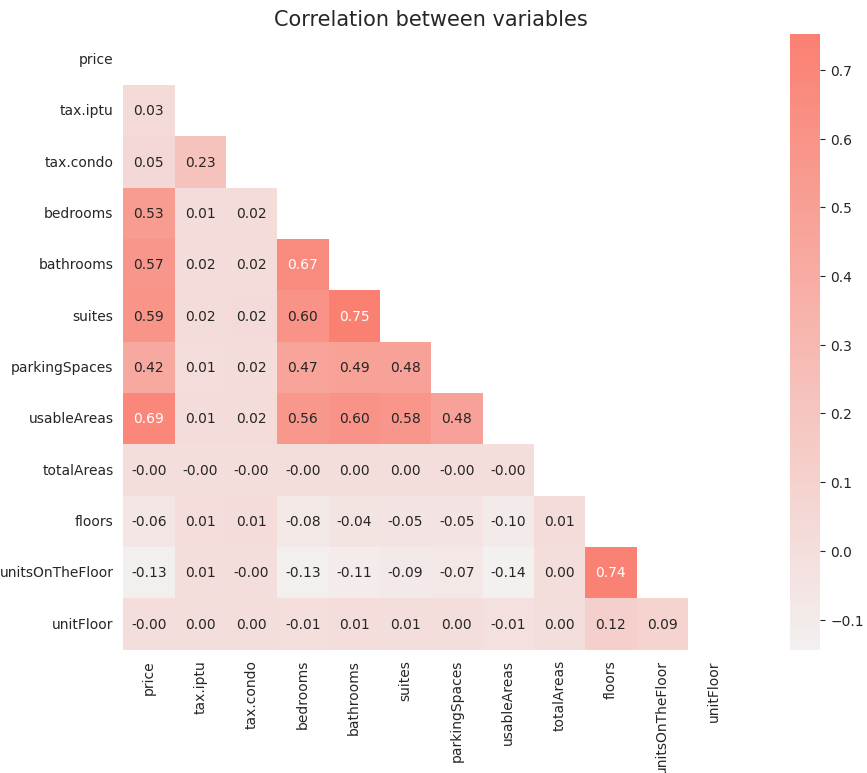

In [127]:
column_n = property_data.select_dtypes(include=['number'])
transformed_correlation = column_n.corr()
mask = np.zeros_like(transformed_correlation)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(transformed_correlation, cmap=colors, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlation between variables', fontsize=15)

c:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\Pandas\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\Pandas\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Price')

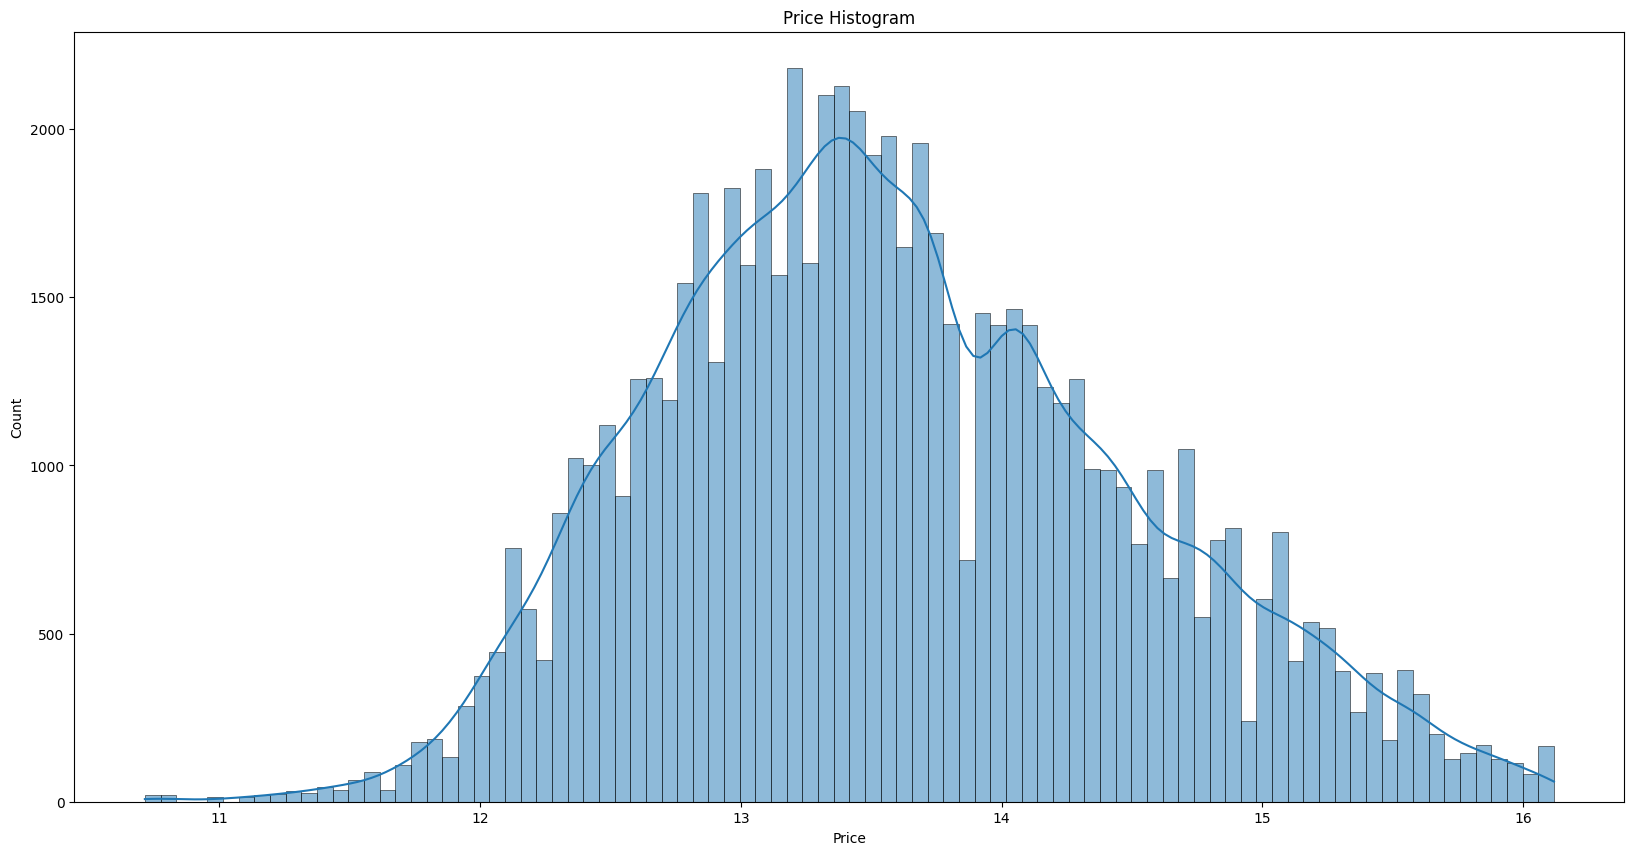

In [128]:
ax = sns.histplot(data=transformed_df, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Price Histogram')
ax.set_xlabel('Price')

In [130]:
categoric_variables = transformed_df.select_dtypes(include=['object']).columns

In [131]:
df_dummies = pd.get_dummies(transformed_df[categoric_variables])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,False,False,True,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False


In [132]:
property_data = pd.concat([transformed_df.drop(categoric_variables, axis=1), df_dummies], axis=1)
property_data.head()

,price,tax.iptu,tax.condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,True,False,False,False,False,True,False
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,False,True,False,False,True,False


In [135]:
from sklearn.model_selection import train_test_split

X =  property_data.drop('price', axis=1)
y = property_data['price']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [138]:
prevision = lr.predict(X_test)
X_test

,tax.iptu,tax.condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
33540,7.496097,7.170888,1.098612,1.098612,0.693147,0.693147,4.430817,4.430817,2.302585,1.945910,1.791759,True,False,False,False,False,True,False
4026,0.693147,5.707110,1.098612,0.693147,0.000000,0.693147,4.007333,0.000000,1.791759,2.302585,0.000000,True,False,False,False,False,True,False
14411,4.330733,6.398595,0.693147,0.693147,0.000000,0.000000,3.663562,3.663562,2.564949,1.609438,2.079442,True,False,False,False,False,False,True
47351,8.331105,7.090910,1.609438,1.098612,0.693147,1.098612,5.099866,5.099866,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
42009,0.000000,0.000000,1.098612,1.098612,0.693147,0.693147,4.418841,4.418841,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52215,6.167516,7.318540,1.386294,0.693147,0.693147,0.693147,4.787492,4.836282,0.000000,0.000000,0.000000,True,False,False,False,False,False,True
29231,7.341484,7.170888,1.386294,1.386294,0.693147,1.098612,4.905275,4.905275,0.000000,0.000000,0.000000,True,False,False,False,True,False,False
30745,5.017280,6.746412,1.098612,1.098612,0.693147,0.693147,4.276666,4.276666,0.000000,0.000000,0.000000,True,False,False,False,True,False,False
2188,0.000000,5.351858,1.098612,0.693147,0.000000,0.693147,3.912023,3.912023,0.000000,0.000000,0.000000,True,False,False,False,True,False,False


In [139]:
np.expm1(7.49)

1789.0520918436703

In [141]:
prevision

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [144]:
np.expm1(12.45)

255249.32262933443

In [145]:
np.expm1(13.25768024)

572448.7513552749

In [146]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, prevision)
r2

0.7880682093407632

In [153]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42, max_depth=10)

In [154]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [155]:
dtr_prevision = dtr.predict(X_test)
dtr_prevision

array([13.55837902, 12.30275952, 13.1131935 , ..., 13.14573444,
       12.15217287, 14.66537716])

In [156]:
np.expm1(13.55136531)

767861.0011640199

In [157]:
!pip install yellowbrick


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))

SyntaxError: invalid syntax (3086703663.py, line 3)